## **ANALISIS SENTIMEN TERHADAP APLIKASI THREADS MENGGUNAKAN ALGORITMA K-MEANS CLUSTERING**

In [1]:
from google.colab import drive
# Mengimpor modul drive dari google.colab
drive.mount('/content/drive')
# Mount Google Drive ke direktori "/content/drive"

Mounted at /content/drive


In [2]:
!pip install Sastrawi
# Menggunakan perintah pip untuk menginstal pustaka Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [3]:
!pip install joblib
# Menggunakan perintah pip untuk menginstal pustaka joblib

### 1. MENAMPILKAN DATA

In [5]:
import pandas as pd
# Mengimpor pustaka pandas untuk manipulasi data
import numpy as np
# Mengimpor pustaka numpy untuk operasi numerik

pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/nlp-project/5000-Data.csv')
df.head(50)
# Memanggil dataset dan menampilkan 50 data teratas untuk preview

,source,review_description,rating,review_date,translated_description
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,Ya ampun. Bukan pengalaman terhebat di Chromeb...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,Cukup bagus untuk peluncuran pertama!! Mudah d...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,"Untuk aplikasi baru, ini dioptimalkan dengan s..."
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,"Aplikasi hebat dengan banyak potensi! Namun, a..."
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,"Aplikasinya bagus, tetapi membutuhkan banyak f..."
5,Google Play,"Currently, it's very challenging to use. It's ...",2,2023-07-18 22:30:10,"Saat ini, sangat sulit untuk menggunakannya. I..."
6,Google Play,I still don’t want to see content from people ...,1,2023-07-19 19:35:31,Saya tetap tidak ingin melihat konten dari ora...
7,Google Play,Could be great if all pages loaded when you cl...,2,2023-07-06 14:35:15,Akan lebih bagus jika semua halaman dimuat saa...
8,Google Play,I'm liking the concept! There is room for impr...,3,2023-07-09 03:27:39,Saya menyukai konsepnya! Namun masih ada ruang...
9,Google Play,Not bad! This is its first launch. There is st...,5,2023-07-06 23:41:13,Tidak buruk! Ini adalah peluncuran pertamanya....


In [5]:
df.info()
#Menampilkan informasi tentang dataset seperti jumlah baris, jumlah kolom, nama kolom, jumlah nilai non-null, tipe data kolom,
#dan jumlah memori yang digunakan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   source                  5000 non-null   object
 1   review_description      5000 non-null   object
 2   rating                  5000 non-null   int64 
 3   review_date             5000 non-null   object
 4   translated_description  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [6]:
df.isna()
#Memeriksa setiap baris yang memiliki nilai null pada semua kolom dataset dengan menggunakan sintaks isna() yang disediakan library pandas.

,source,review_description,rating,review_date,translated_description
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4995,False,False,False,False,False
4996,False,False,False,False,False
4997,False,False,False,False,False
4998,False,False,False,False,False


In [7]:
df.isna().any()
#Memeriksa apakah ada nilai yang hilang dalam setiap kolom dataset.

source                    False
review_description        False
rating                    False
review_date               False
translated_description    False
dtype: bool

In [8]:
df.describe()
#Menampilkan statistik deskriptif tentang dataset seperti jumlah, mean, standar deviasi, nilai minimum, kuartil 1, median, kuartil 3,
#dan nilai maksimum dari kolom Skor Kepuasan.

,rating
count,5000.000000
mean,2.796400
std,1.544741
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [9]:
df.isnull().sum()
#Mencari jumlah baris data yang bernilai null dan memeriksa apakah terdapat kolom label yang memiliki nilai kosong.

source                    0
review_description        0
rating                    0
review_date               0
translated_description    0
dtype: int64

### 2. PREPROCESSING TEXT

In [6]:
# Import library
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Mengimpor StemmerFactory dari pustaka Sastrawi
import nltk
# Mengimpor pustaka nltk (Natural Language Toolkit)
import re
# Mengimpor modul re (regular expressions)

nltk.download('punkt')
# Mengunduh dataset 'punkt' dari nltk (digunakan untuk tokenisasi)
nltk.download('stopwords')
# Mengunduh dataset 'stopwords' dari nltk (digunakan untuk menghapus kata-kata tidak penting)

# Define preprocessing function
def preprocess(text):
   # Remove punctuation
   text = re.sub(r'[^\w\s]', '', text)
   # Menghapus tanda baca menggunakan regular expressions
   # Lowercase
   text = text.lower()
   # Mengubah semua huruf menjadi huruf kecil
   # Tokenize
   text = nltk.word_tokenize(text)
   # Melakukan tokenisasi teks menjadi kata-kata
   # Remove stopwords
   stopwords = nltk.corpus.stopwords.words('indonesian')
   # Mengambil kata-kata tidak penting berbahasa Indonesia
   text = [word for word in text if word not in stopwords]
   # Menghapus kata-kata tidak penting
   # Stemming
   factory = StemmerFactory()
   # Membuat objek factory dari StemmerFactory
   stemmer = factory.create_stemmer()
   # Membuat objek stemmer menggunakan factory
   text = [stemmer.stem(word) for word in text]
   # Melakukan stemming pada kata-kata
   # Return preprocessed text
   return text
   # Mengembalikan teks yang telah diproses

# Function to cast a vector
def cast_vector(row):
   return np.array(list(map(lambda x: x.astype('double'), row)))
   # Mengonversi elemen-elemen vektor menjadi tipe data 'double'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 3. TRAINING DATASET

In [7]:
# Import library
import pandas as pd
# Mengimpor pustaka pandas untuk manipulasi data
import numpy as np
# Mengimpor pustaka numpy untuk operasi numerik
import gensim
# Mengimpor pustaka gensim untuk pemodelan bahasa alami
import joblib
# Mengimpor pustaka joblib untuk penyimpanan model
from sklearn.cluster import KMeans
# Mengimpor modul KMeans dari pustaka scikit-learn untuk clustering
from sklearn.metrics import accuracy_score
# Mengimpor metrik akurasi dari pustaka scikit-learn

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/nlp-project/5000-Data.csv')
# Membaca dataset dari file CSV dengan nama '5000-Data.csv'

# Preprocess data
# Remove punctuation, lowercase, tokenize, etc.
# You can use your own preprocessing function here
df['translated_description'] = df['translated_description'].apply(preprocess)
# Memproses kolom 'translated_description' dengan fungsi preprocess()

# Train Word2Vec model
model = gensim.models.Word2Vec(df['translated_description'], vector_size=100, window=5, min_count=1, workers=4)
# Melatih model Word2Vec dengan parameter tertentu untuk melakukan featured extraction dengan mengubah teks menjadi vektor numerik

# Get word vectors
word_vectors = model.wv
# Mendapatkan vektor kata dari model Word2Vec

# Save the model
model.save('/content/drive/MyDrive/nlp-project/word2vec.model')
# Menyimpan model Word2Vec ke dalam file 'word2vec.model'

# Get sentence vectors by averaging word vectors
sentence_vectors = []
for text in df['translated_description']:
  vector = np.mean([word_vectors[word] for word in text], axis=0)
  sentence_vectors.append(vector)
  # Menghitung vektor kalimat dengan mengambil rata-rata vektor kata

# Convert to numpy array
sentence_vectors = np.array(sentence_vectors).astype(np.double)
# Mengkonversi hasil vektor kalimat menjadi array numpy dengan tipe data double

# Cluster data using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
# Menginisialisasi model K-Means dengan 3 cluster
kmeans.fit(sentence_vectors)
# Melakukan clustering pada vektor kalimat

# Save the model
joblib.dump(kmeans, '/content/drive/MyDrive/nlp-project/kmeans.model')
# Menyimpan model K-Means ke dalam file 'kmeans.model'

# Get cluster labels
labels = kmeans.labels_
# Mendapatkan label cluster untuk setiap data

# Assign labels to data
df['label'] = labels
# Menambahkan kolom ’label’ ke dataset yang berisi label cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 4. TESTING MODEL

In [8]:
# Import library
import pandas as pd
# Mengimpor pustaka pandas untuk manipulasi data
import numpy as np
# Mengimpor pustaka numpy untuk operasi numerik
import gensim
# Mengimpor pustaka gensim untuk pemodelan bahasa alami
from sklearn.cluster import KMeans
# Mengimpor modul KMeans dari pustaka scikit-learn untuk clustering
from sklearn.metrics import accuracy_score
# Mengimpor metrik akurasi dari pustaka scikit-learn
import joblib
# Mengimpor pustaka joblib untuk penyimpanan model

# Load trained models
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/nlp-project/word2vec.model')
# Memuat model Word2Vec yang telah dilatih dari file

# Load the model
kmeans = joblib.load('/content/drive/MyDrive/nlp-project/kmeans.model')
# Memuat model K-Means yang telah dilatih dari file 'kmeans.model'

# Define mapping function
def map_label_to_sentiment(label):
  # You can use your own mapping function here
  if label == 0:
    return 'positive'
  elif label == 1:
    return 'negative'
  else:
    return 'neutral'

# Get text input from user
text = input('Masukkan Input: ')
# Mengambil input teks dari pengguna

# Preprocess text
# Remove punctuation, lowercase, tokenize, etc.
# You can use your own preprocessing function here
text = preprocess(text)
# Memproses teks input menggunakan fungsi preprocess

# Get word vectors
word_vectors = model.wv
# Mendapatkan vektor kata dari model Word2Vec

# Get sentence vector by averaging word vectors
sentence_vector = np.mean([word_vectors[word] for word in text], axis=0)
# Menghitung vektor kalimat dengan mengambil rata-rata vektor kata

# Ubah tipe data menjadi double
sentence_vector = np.array(sentence_vector, dtype=np.double)
# Mengkonversi vektor kalimat menjadi tipe data double

# Prediksi label cluster
label = kmeans.predict([sentence_vector])[0]
# Memprediksi label cluster untuk vektor kalimat

# Map label to sentiment class
sentiment = map_label_to_sentiment(label)
# Mengonversi label cluster menjadi kelas sentimen

# Print sentiment result
print('Sentimen dari teks tersebut adalah:', sentiment)
# Mencetak hasil sentimen ke layar

Masukkan Input: Pengalaman saya menggunakan aplikasi ini menakjubkan.
Sentimen dari teks tersebut adalah: positive


REFERENCES: https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook

---

In [15]:
import pandas as pd

# Load dataset (jika belum dilakukan)
# df = pd.read_csv('/content/drive/MyDrive/nlp-project/5000-Data.csv')

# Mendefinisikan fungsi untuk memetakan label kluster ke label sentimen
def map_cluster_to_sentiment(cluster_label):
    if cluster_label == 0:
        return 'positive'
    elif cluster_label == 1:
        return 'negative'
    else:
        return 'neutral'

# Mendapatkan label kluster dari model K-Means
labels = kmeans.labels_

# Memetakan label kluster ke label sentimen dan menambahkannya sebagai kolom baru
df['sentiment'] = [map_cluster_to_sentiment(label) for label in labels]

# Menyimpan DataFrame yang telah diberi label sentimen ke file CSV jika diperlukan
df.to_csv('/content/drive/MyDrive/nlp-project/5000-Data-With-Sentiment.csv', index=False)

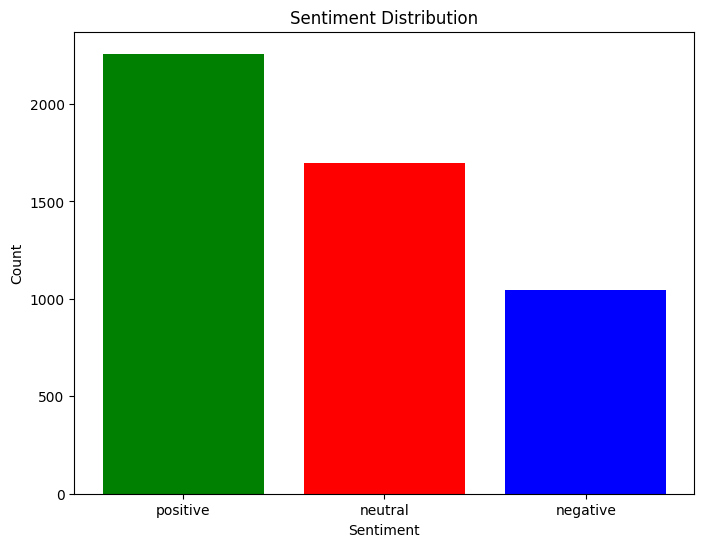

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca DataFrame yang telah ditambahkan kolom sentimen
df = pd.read_csv('/content/drive/MyDrive/nlp-project/5000-Data-With-Sentiment.csv')

# Menghitung jumlah data dalam setiap sentimen
sentiment_counts = df['sentiment'].value_counts()

# Membuat plot sebar untuk visualisasi
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

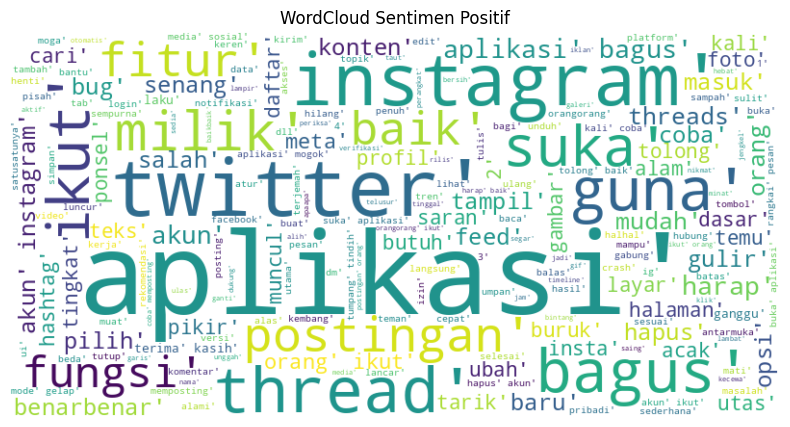

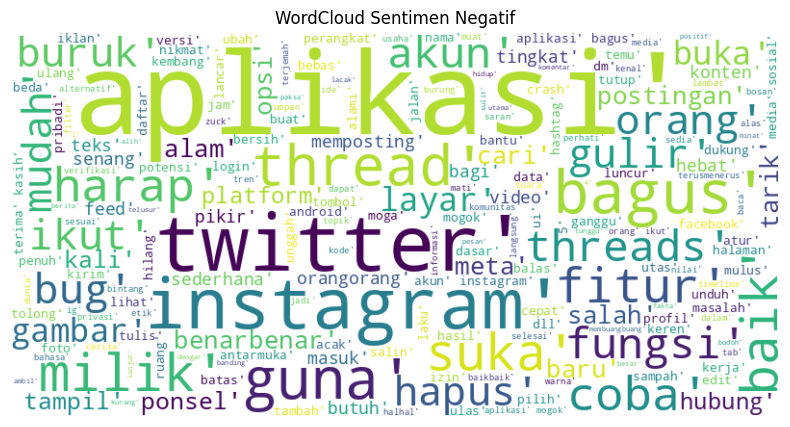

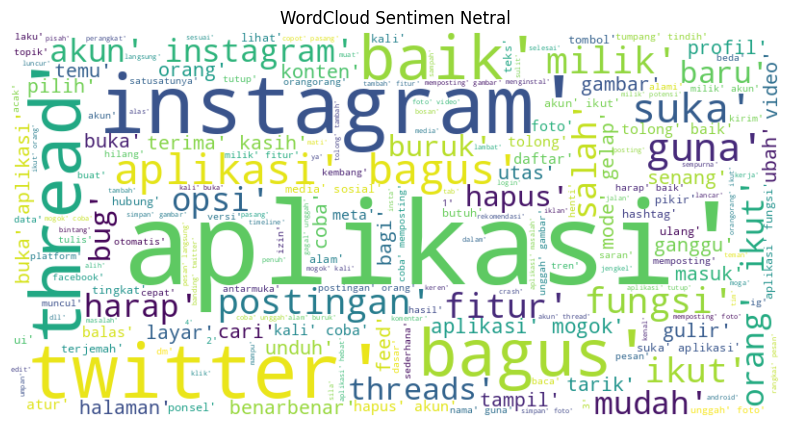

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your data (assuming you have a DataFrame with 'text' and 'sentiment' columns)
df = pd.read_csv('/content/drive/MyDrive/nlp-project/5000-Data-With-Sentiment.csv')

# Separate text based on sentiment
positive_text = " ".join(df[df['sentiment'] == 'positive']['translated_description'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['translated_description'])
neutral_text = " ".join(df[df['sentiment'] == 'neutral']['translated_description'])

# Create WordClouds for each sentiment
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

create_wordcloud(positive_text, "WordCloud Sentimen Positif")
create_wordcloud(negative_text, "WordCloud Sentimen Negatif")
create_wordcloud(neutral_text, "WordCloud Sentimen Netral")